<a href="https://colab.research.google.com/github/Mohammad-Kaosain-Akbar/Absenteeism-Regression/blob/main/Absenteeism_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split


import keras
from keras.models import Sequential
from keras.layers import Dense

from IPython.display import Image, display

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/Absenteeism-Regression/main/Absenteeism_at_work.csv')
df.reset_index(drop=True, inplace=True)
df.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,0,1,2,1,0,2,100,170,35,0


In [ ]:
# categorical = [ 'Reason for absence','Day of the week', 'Seasons','Transportation expense']
# fig, ax = plt.subplots(2, 2, figsize=(15, 15))
# for var, subplot in zip(categorical, ax.flatten()):
#     sns.boxplot(x = var, y='Absenteeism time in hours', data = df, ax = subplot)

In [ ]:
df.drop('ID', inplace=True, axis=1)
df.drop('Weight', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

# df.drop('Body mass index', inplace=True, axis=1)

df['Work load Average/day '] = pd.to_numeric(df['Work load Average/day '].str.replace(',',''), errors='coerce') # removing comma from values such as 100,000


In [ ]:
df1 = df

Data Visualization 

In [ ]:
df1.loc[df1['Month of absence'] == 0]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
737,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,34,0
738,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,35,0
739,0,0,6,3,179,45,14,53,271219,95,0,1,1,0,0,1,25,0


In [ ]:
df1.loc[df1['Reason for absence'] == 0]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,31,0
50,0,9,2,4,260,50,11,36,241476,92,1,1,4,1,0,0,23,0
51,0,9,2,4,225,26,9,28,241476,92,1,1,1,0,0,2,24,0
54,0,9,3,4,289,36,13,33,241476,92,1,1,2,1,0,1,30,0
55,0,9,3,4,118,13,18,50,241476,92,1,1,1,1,0,0,31,0
58,0,9,4,4,369,17,12,31,241476,92,1,1,3,1,0,0,25,0
64,0,10,4,4,118,13,18,50,253465,93,1,1,1,1,0,0,31,0
203,0,4,2,3,235,29,12,48,326452,96,1,1,1,0,1,5,33,0
213,0,5,4,3,279,5,14,39,378884,92,1,1,2,1,1,0,24,0
214,0,5,4,3,330,16,4,28,378884,92,1,2,0,0,0,0,25,0


In [ ]:
df1.loc[df1['Absenteeism time in hours'] == 0]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,31,0
50,0,9,2,4,260,50,11,36,241476,92,1,1,4,1,0,0,23,0
51,0,9,2,4,225,26,9,28,241476,92,1,1,1,0,0,2,24,0
54,0,9,3,4,289,36,13,33,241476,92,1,1,2,1,0,1,30,0
55,0,9,3,4,118,13,18,50,241476,92,1,1,1,1,0,0,31,0
58,0,9,4,4,369,17,12,31,241476,92,1,1,3,1,0,0,25,0
64,0,10,4,4,118,13,18,50,253465,93,1,1,1,1,0,0,31,0
134,27,1,2,2,118,10,10,37,308593,95,0,1,0,0,0,0,28,0
203,0,4,2,3,235,29,12,48,326452,96,1,1,1,0,1,5,33,0
213,0,5,4,3,279,5,14,39,378884,92,1,1,2,1,1,0,24,0


In [ ]:
df1.drop(df1.index[df1['Month of absence'] == 0], inplace=True)
df1.drop(df1.index[df1['Absenteeism time in hours'] == 0], inplace=True)
df1.drop(df1.index[df1['Reason for absence'] == 0], inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 736
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Reason for absence               696 non-null    int64
 1   Month of absence                 696 non-null    int64
 2   Day of the week                  696 non-null    int64
 3   Seasons                          696 non-null    int64
 4   Transportation expense           696 non-null    int64
 5   Distance from Residence to Work  696 non-null    int64
 6   Service time                     696 non-null    int64
 7   Age                              696 non-null    int64
 8   Work load Average/day            696 non-null    int64
 9   Hit target                       696 non-null    int64
 10  Disciplinary failure             696 non-null    int64
 11  Education                        696 non-null    int64
 12  Son                              696 non-null    i

In [ ]:
# cat = {"Reason for absence":     {1:"Infectious and parasitic diseases", 2: "Neoplasms", 3: "Diseases of the blood and disorders in immune mechanism", 
#                                   4: "Endocrine, nutritional and metabolic diseases", 5: "Mental and behavioural disorders", 6: "Diseases of the nervous system", 7: "Diseases of the eye and adnexa",
#                                   8: "Diseases of the ear and mastoid process", 9:"Diseases of the circulatory system", 10: "Diseases of the respiratory system", 11: "Diseases of the digestive system",
#                                   12: "Diseases of the skin and subcutaneous tissue", 13: "Diseases of the musculoskeletal system and connective tissue", 14: "Diseases of the genitourinary system",
#                                   15: "Pregnancy, childbirth and the puerperium", 16: "Certain conditions originating in the perinatal period", 17: "Congenital malformations, deformations and chromosomal abnormalities",
#                                   18: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified", 19:"Injury, poisoning and certain other consequences of external causes",
#                                   20: "External causes of morbidity and mortality", 21: "Factors influencing health status and contact with health services", 22: "patient follow-up", 23: "medical consultation", 24:"blood donation",
#                                   25: "laboratory examination", 26: "unjustified absence", 27: "physiotherapy", 28: "dental consultation "},
#        }

# df1 = df1.replace(cat)

In [ ]:
#heat map
# import seaborn as sns
# ax = sns.heatmap(df1)

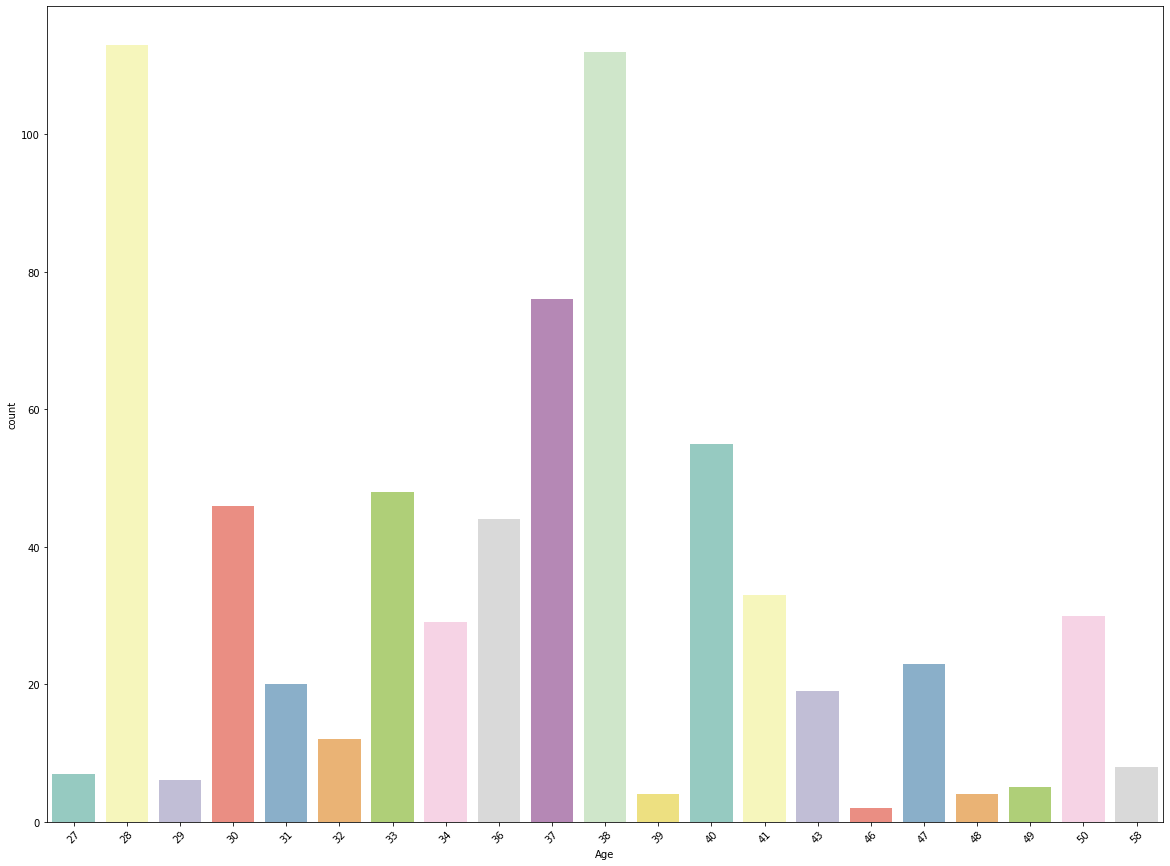

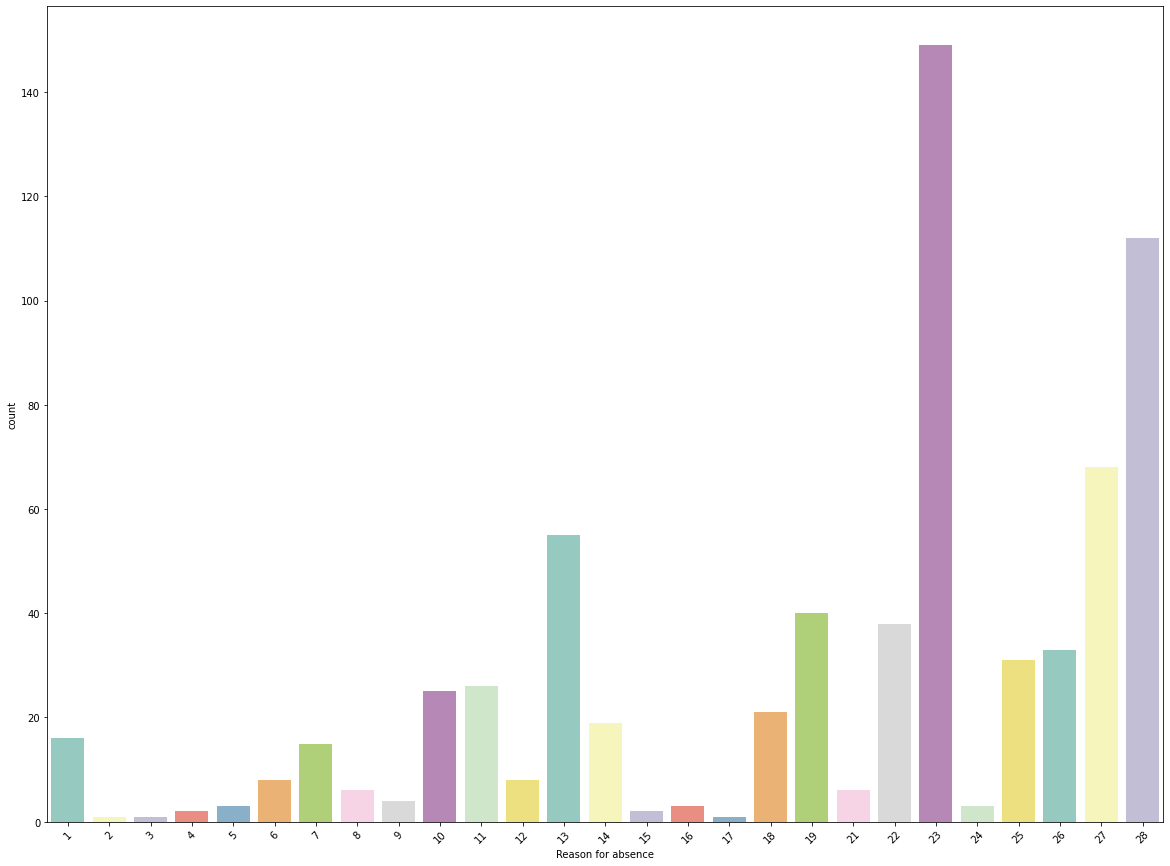

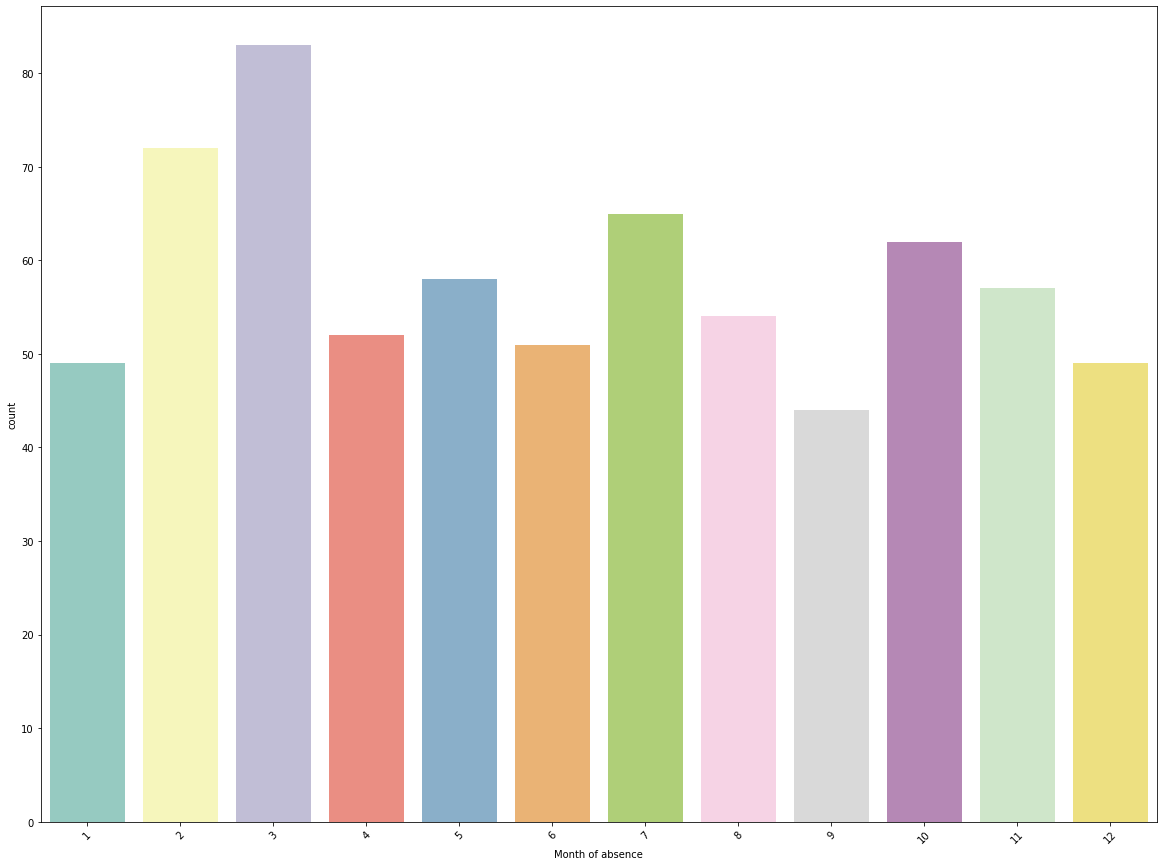

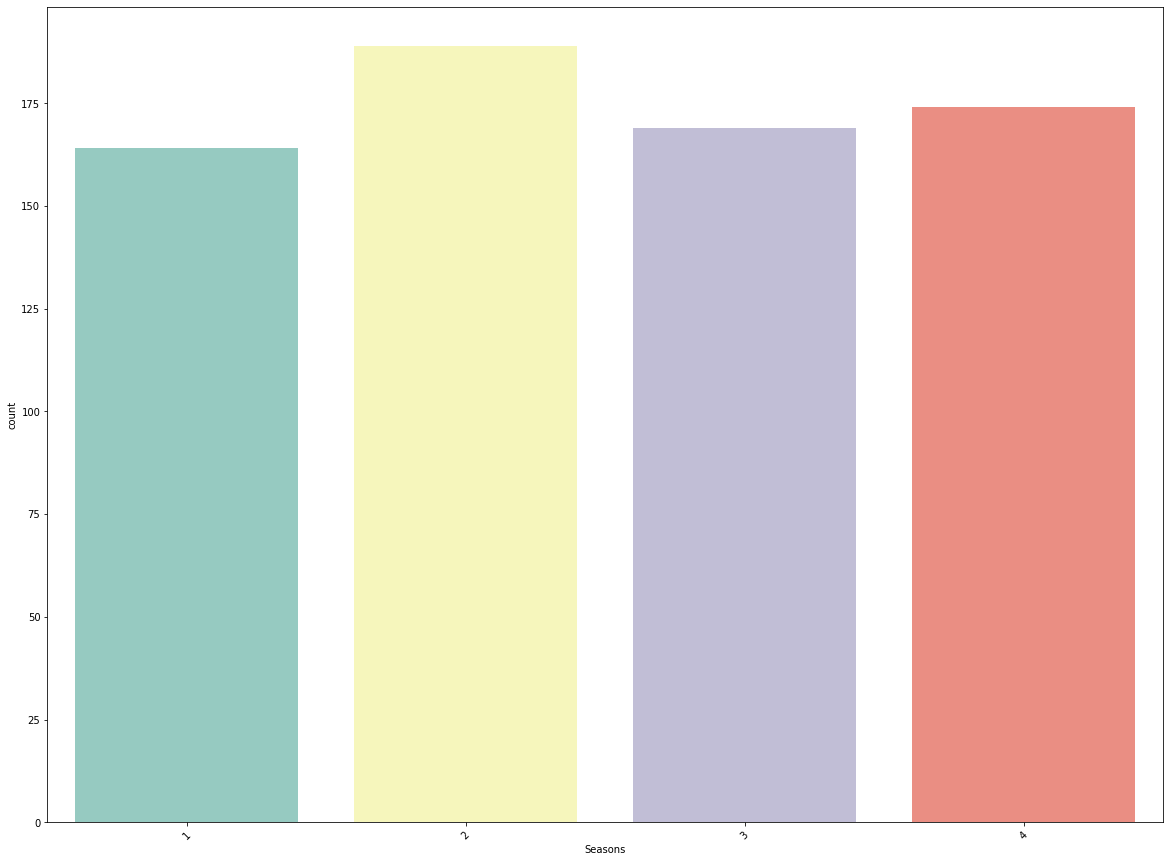

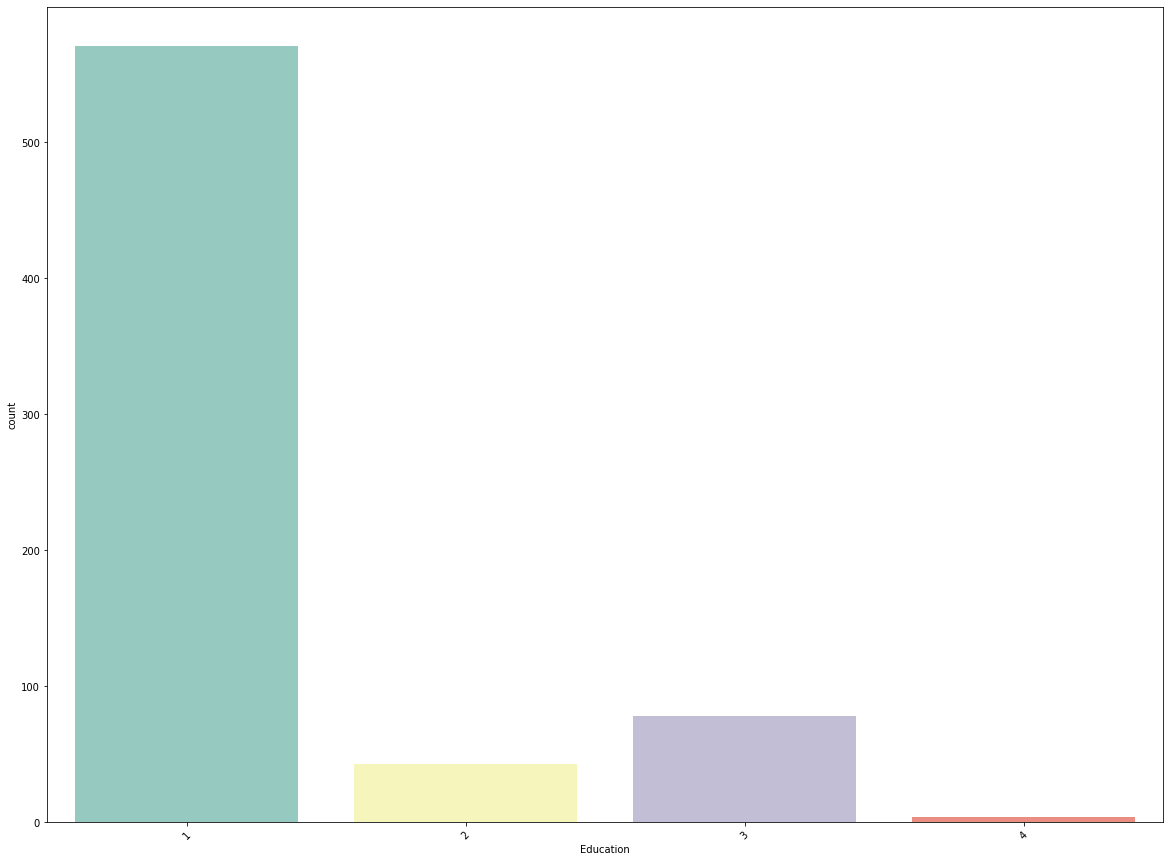

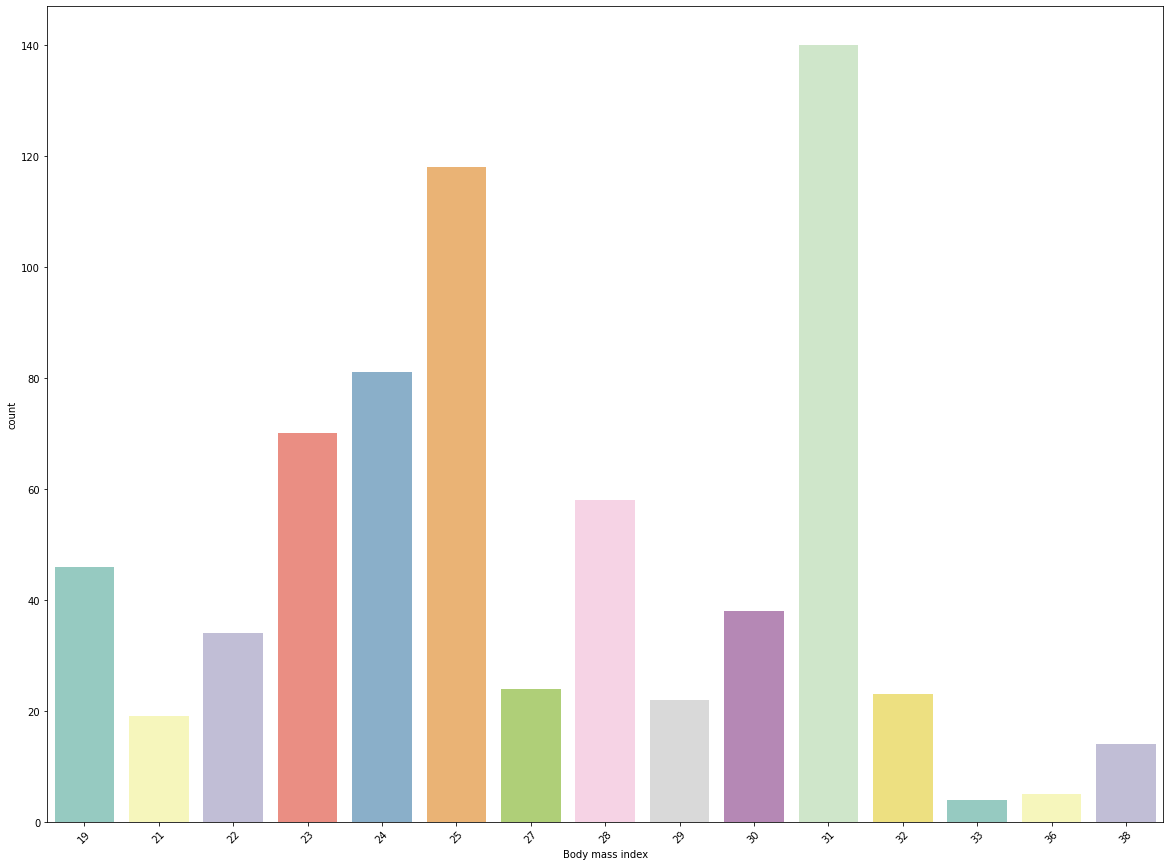

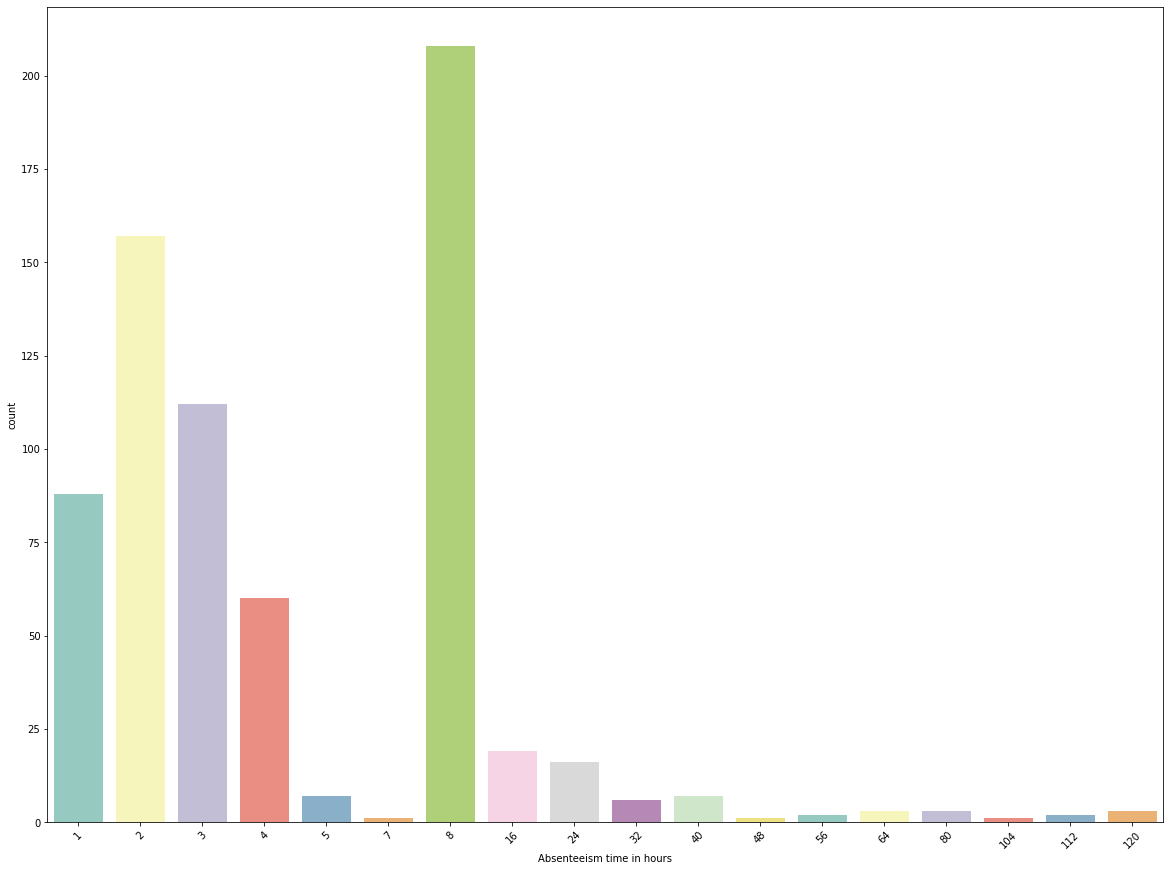

In [ ]:
features = [ 'Age','Reason for absence','Month of absence', 'Seasons', 'Education', 'Body mass index', 'Absenteeism time in hours']

for f in features:
    sns.countplot(x = f, data = df1, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

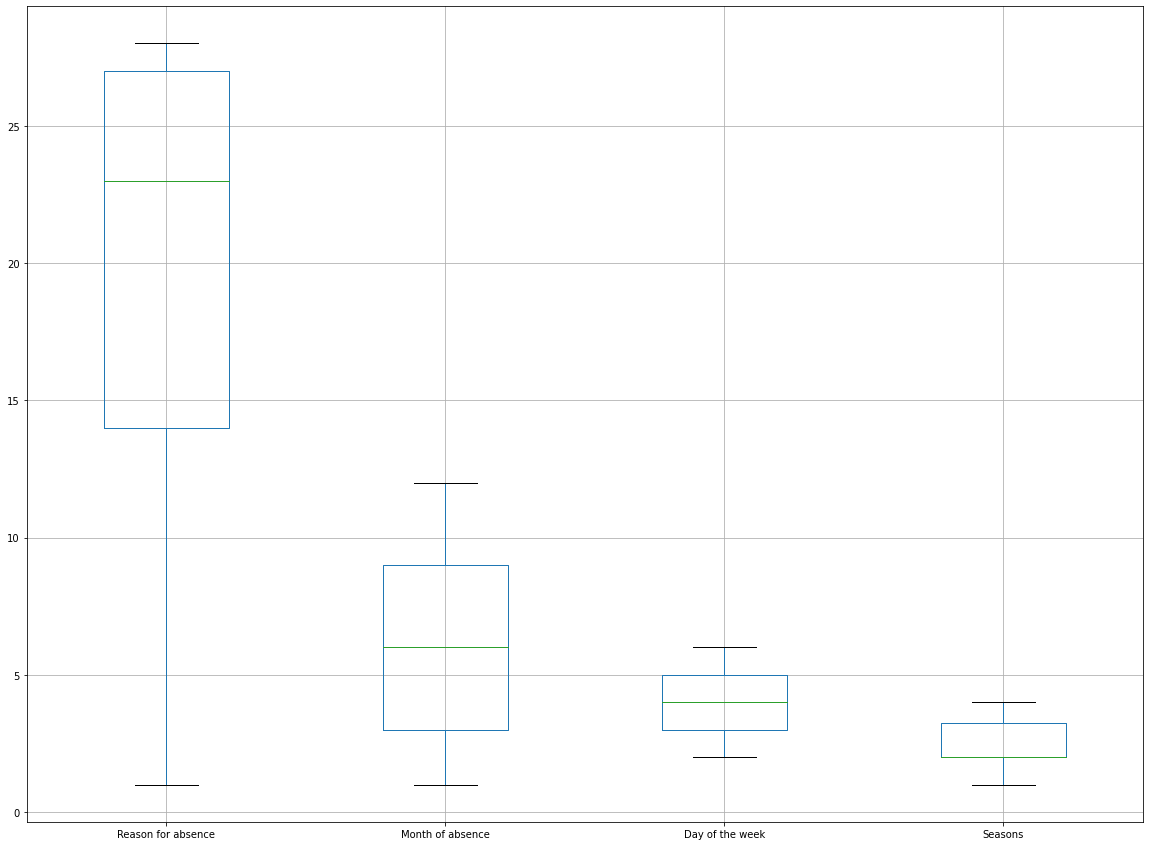

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
boxplot = df.boxplot(column=['Reason for absence','Month of absence','Day of the week','Seasons'])  

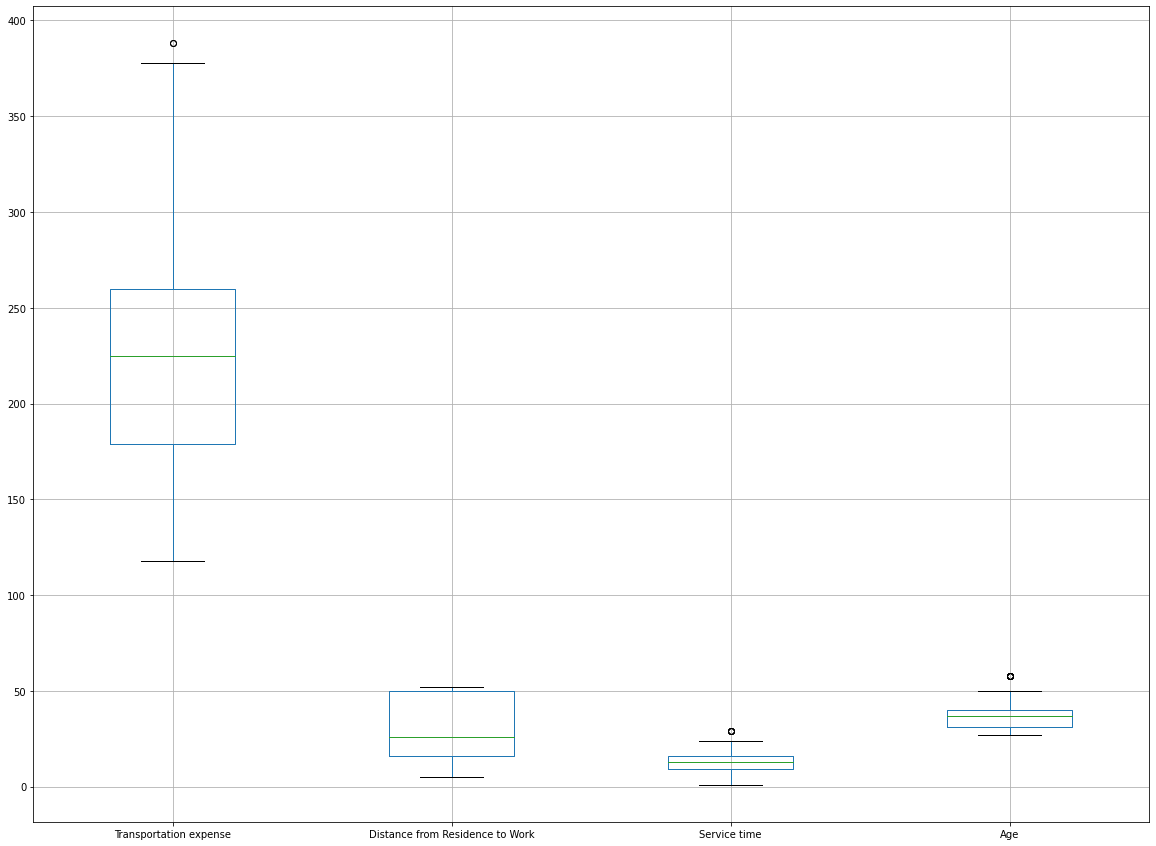

In [ ]:
boxplot = df.boxplot(column=['Transportation expense','Distance from Residence to Work','Service time','Age'])  

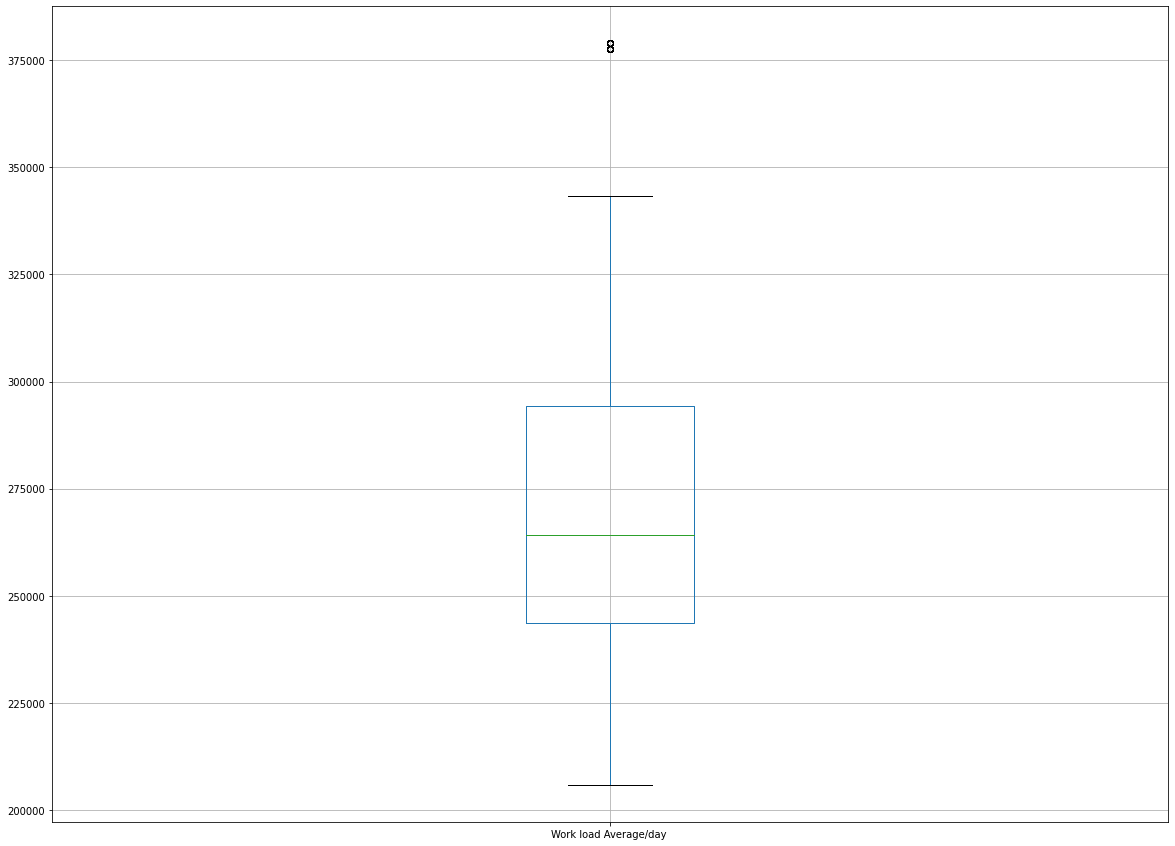

In [ ]:
boxplot = df.boxplot(column=['Work load Average/day '])

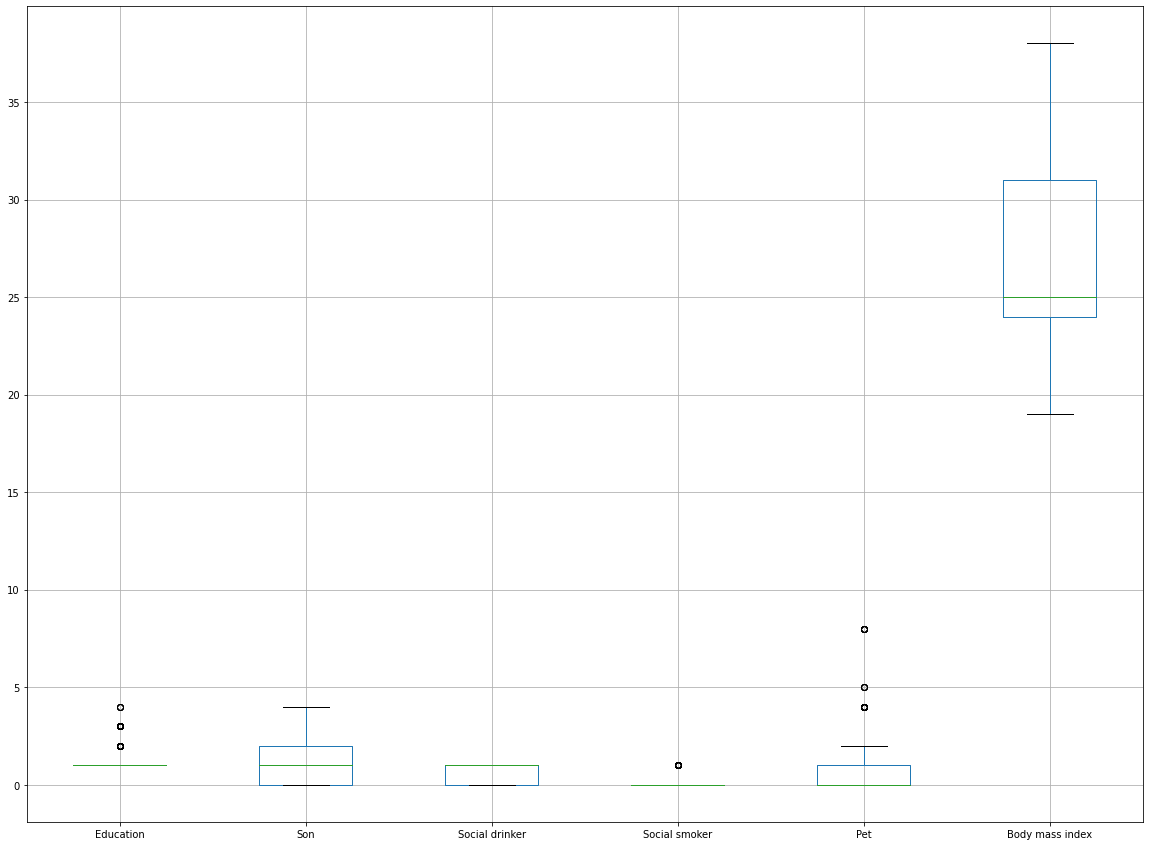

In [ ]:
boxplot = df.boxplot(column=['Education',	'Son',	'Social drinker',	'Social smoker',	'Pet',	'Body mass index'])

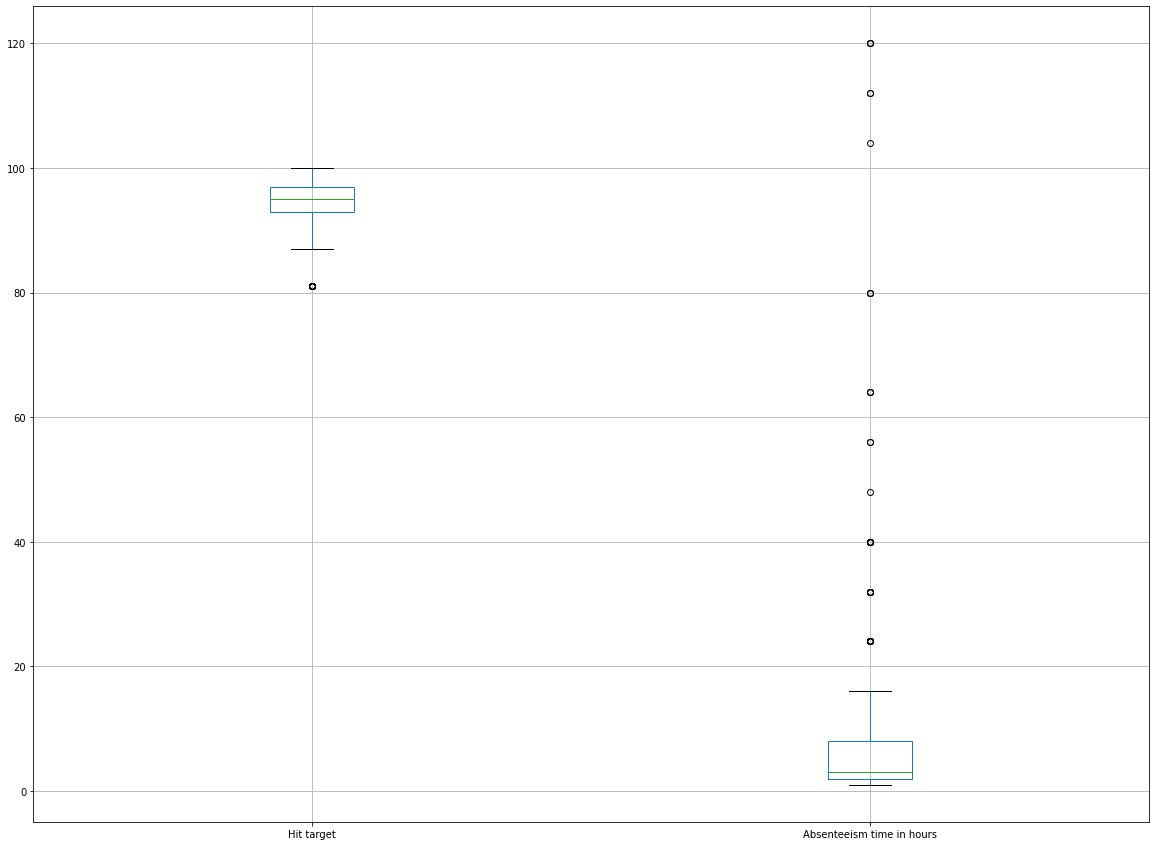

In [ ]:
boxplot = df.boxplot(column=['Hit target','Absenteeism time in hours'])

In [ ]:
df = df1

Removing Outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.info()
df.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 0 to 735
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Reason for absence               439 non-null    int64
 1   Month of absence                 439 non-null    int64
 2   Day of the week                  439 non-null    int64
 3   Seasons                          439 non-null    int64
 4   Transportation expense           439 non-null    int64
 5   Distance from Residence to Work  439 non-null    int64
 6   Service time                     439 non-null    int64
 7   Age                              439 non-null    int64
 8   Work load Average/day            439 non-null    int64
 9   Hit target                       439 non-null    int64
 10  Disciplinary failure             439 non-null    int64
 11  Education                        439 non-null    int64
 12  Son                              439 non-null    i

Selecting X and Y variables

In [ ]:
x = df.iloc[:,0:17] 
x

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,30
1,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,31
2,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,30
3,23,7,6,1,179,51,18,38,239554,97,0,1,0,1,0,0,31
4,23,7,6,1,260,50,11,36,239554,97,0,1,4,1,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,28,7,2,1,118,10,10,37,264604,93,0,1,0,0,0,0,28
435,22,7,3,1,189,29,13,33,264604,93,0,1,2,0,0,2,25
436,23,7,4,1,118,10,10,37,264604,93,0,1,0,0,0,0,28
437,22,7,4,1,225,26,9,28,264604,93,0,1,1,0,0,2,24


In [ ]:
y = df.iloc[:,17:18] 
y

,Absenteeism time in hours
0,4
1,2
2,2
3,2
4,4
...,...
434,4
435,16
436,2
437,8


In [ ]:
# Splitting X and Y into X_train, Y_train, X_test and Y_test 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
#  using sklearn library for normalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Regression Models by SK Learn

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()

from sklearn.neighbors import KNeighborsRegressor
model2 = MultiOutputRegressor(KNeighborsRegressor())

from lightgbm import LGBMRegressor
model3 = MultiOutputRegressor(LGBMRegressor())

from sklearn import linear_model
model4 = MultiOutputRegressor(linear_model.Lasso(alpha=0.1))

from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

from sklearn.linear_model import SGDRegressor
model6 = MultiOutputRegressor(SGDRegressor())

from sklearn.neural_network import MLPRegressor
model7 = MultiOutputRegressor(MLPRegressor(random_state=1, max_iter=500))

Using K Fold Cross Validation to evaluate the overall performance of the regression models

In [ ]:
# https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from numpy import mean
from numpy import std
from numpy import absolute

cv = KFold(n_splits=5, random_state=None, shuffle=False)

scores1 = cross_val_score(model1, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores1 = absolute(scores1)
print('Mean MAE score of the Decision Tree Regression: %.3f ' % (mean(scores1)))

scores2 = cross_val_score(model2, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean MAE score of the K Neighbor Regressor: %.3f ' % (mean(scores2)))

scores3 = cross_val_score(model3, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores3 = absolute(scores3)
print('Mean MAE score of the LGBM Regression: %.3f ' % (mean(scores3)))

scores4 = cross_val_score(model4, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores4 = absolute(scores4)
print('Mean MAE score of the Lasso Regression: %.3f ' % (mean(scores4)))

scores5 = cross_val_score(model5, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores5 = absolute(scores5)
print('Mean MAE score of the Linear Regression: %.3f ' % (mean(scores5)))

scores6 = cross_val_score(model6, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores6 = absolute(scores6)
print('Mean MAE score of the SGD Regression: %.3f ' % (mean(scores6)))

scores7 = cross_val_score(model7, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores7 = absolute(scores7)
print('Mean MAE score of the MLP Regression: %.3f ' % (mean(scores7)))

Mean MAE score of the Decision Tree Regression: 2.199 
Mean MAE score of the K Neighbor Regressor: 2.174 
Mean MAE score of the LGBM Regression: 1.757 
Mean MAE score of the Lasso Regression: 2.080 
Mean MAE score of the Linear Regression: 1.983 
Mean MAE score of the SGD Regression: 1.982 
Mean MAE score of the MLP Regression: 2.220 


In [ ]:
scores1 = cross_val_score(model1, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores1 = absolute(scores1)
print('Mean MSE score of the Decision Tree Regression: %.3f ' % (mean(scores1)))

scores2 = cross_val_score(model2, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean MSE score of the K Neighbor Regressor: %.3f ' % (mean(scores2)))

scores3 = cross_val_score(model3, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores3 = absolute(scores3)
print('Mean MSE score of the LGBM Regression: %.3f ' % (mean(scores3)))

scores4 = cross_val_score(model4, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores4 = absolute(scores4)
print('Mean MSE score of the Lasso Regression: %.3f ' % (mean(scores4)))

scores5 = cross_val_score(model5, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores5 = absolute(scores5)
print('Mean MSE score of the Linear Regression: %.3f ' % (mean(scores5)))

scores6 = cross_val_score(model6, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores6 = absolute(scores6)
print('Mean MSE score of the SGD Regression: %.3f ' % (mean(scores6)))

scores7 = cross_val_score(model7, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores7 = absolute(scores7)
print('Mean MSE score of the MLP Regression: %.3f ' % (mean(scores7)))

Mean MSE score of the Decision Tree Regression: 11.934 
Mean MSE score of the K Neighbor Regressor: 9.065 
Mean MSE score of the LGBM Regression: 6.294 
Mean MSE score of the Lasso Regression: 7.922 
Mean MSE score of the Linear Regression: 7.804 
Mean MSE score of the SGD Regression: 7.815 
Mean MSE score of the MLP Regression: 9.393 


In [ ]:
scores1 = cross_val_score(model1, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores1 = absolute(scores1)
print('Mean R2 score of the Decision Tree Regression: %.3f ' % (mean(scores1)))

scores2 = cross_val_score(model2, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean R2 score of the K Neighbor Regressor: %.3f ' % (mean(scores2)))

scores3 = cross_val_score(model3, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores3 = absolute(scores3)
print('Mean R2 score of the LGBM Regression: %.3f ' % (mean(scores3)))

scores4 = cross_val_score(model4, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores4 = absolute(scores4)
print('Mean R2 score of the Lasso Regression: %.3f ' % (mean(scores4)))

scores5 = cross_val_score(model5, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores5 = absolute(scores5)
print('Mean R2 score of the Linear Regression: %.3f ' % (mean(scores5)))

scores6 = cross_val_score(model6, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores6 = absolute(scores6)
print('Mean R2 score of the SGD Regression: %.3f ' % (mean(scores6)))

scores7 = cross_val_score(model7, x, y, scoring='r2', cv=cv, n_jobs=-1)
scores7 = absolute(scores7)
print('Mean R2 score of the MLP Regression: %.3f ' % (mean(scores7)))

Mean R2 score of the Decision Tree Regression: 0.220 
Mean R2 score of the K Neighbor Regressor: 0.113 
Mean R2 score of the LGBM Regression: 0.358 
Mean R2 score of the Lasso Regression: 0.208 
Mean R2 score of the Linear Regression: 0.218 
Mean R2 score of the SGD Regression: 0.225 
Mean R2 score of the MLP Regression: 0.155 


Generating TEST vs PREDICT graph for the regression models using SK Learn Train/Test Split

Decision Tree Regression

In [ ]:
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
y_test=y_test.to_numpy()

In [ ]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)
tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

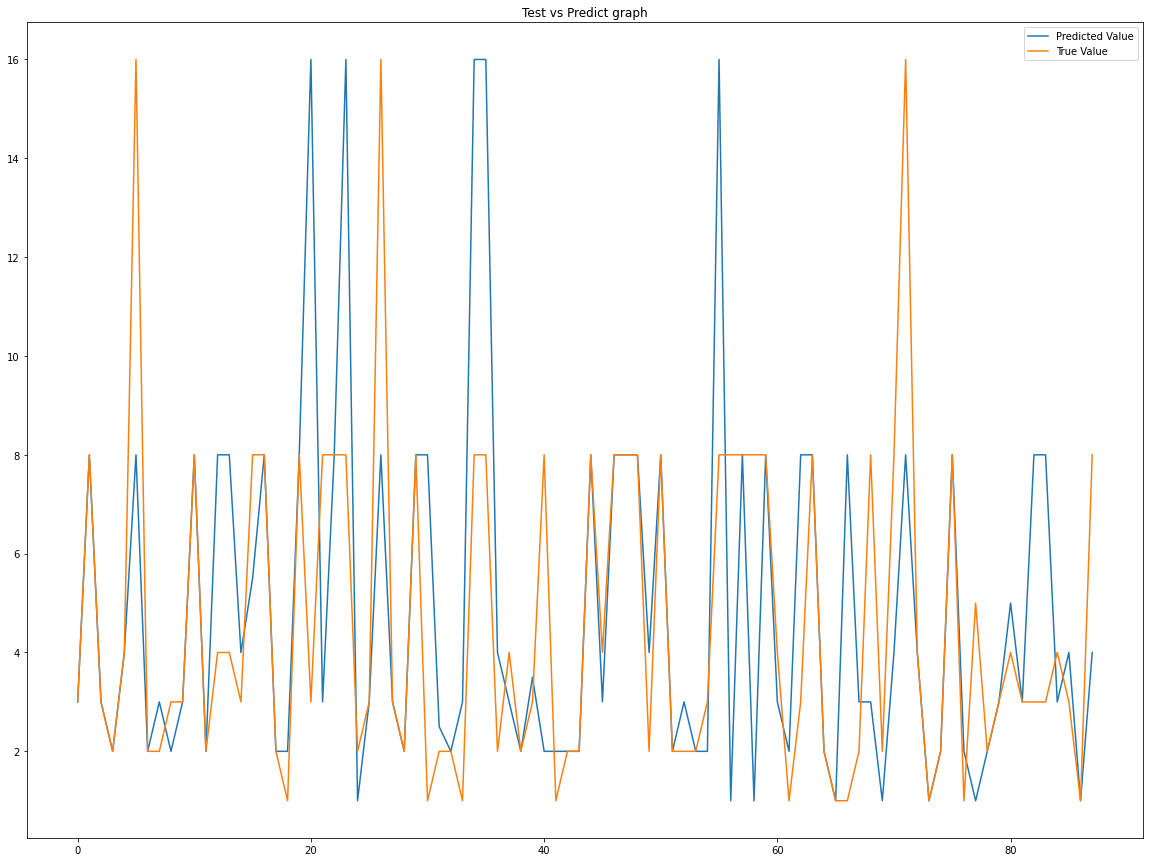

In [ ]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')

K Neighbor Regression

In [ ]:
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
# y_test=y_test.to_numpy()

In [ ]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)
tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

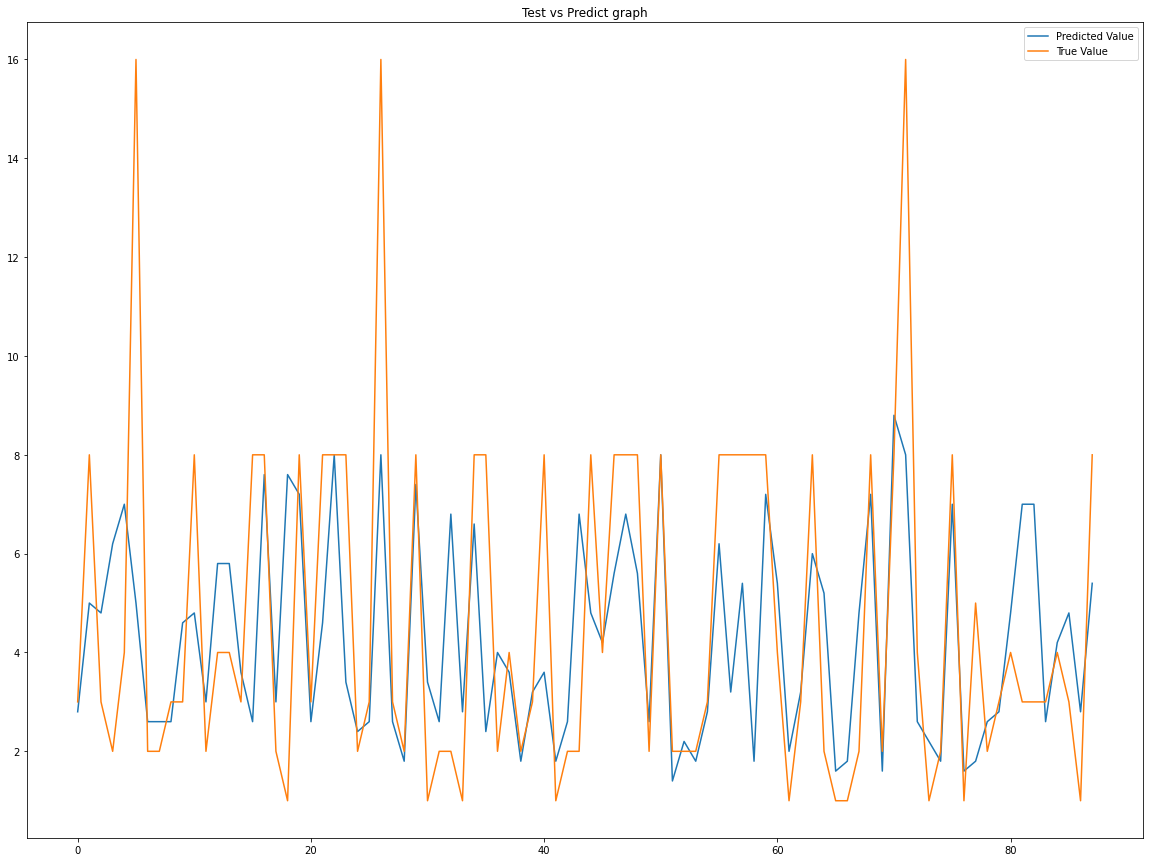

In [ ]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')

LGBM Regression

In [ ]:
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
# y_test=y_test.to_numpy()

In [ ]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)
tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

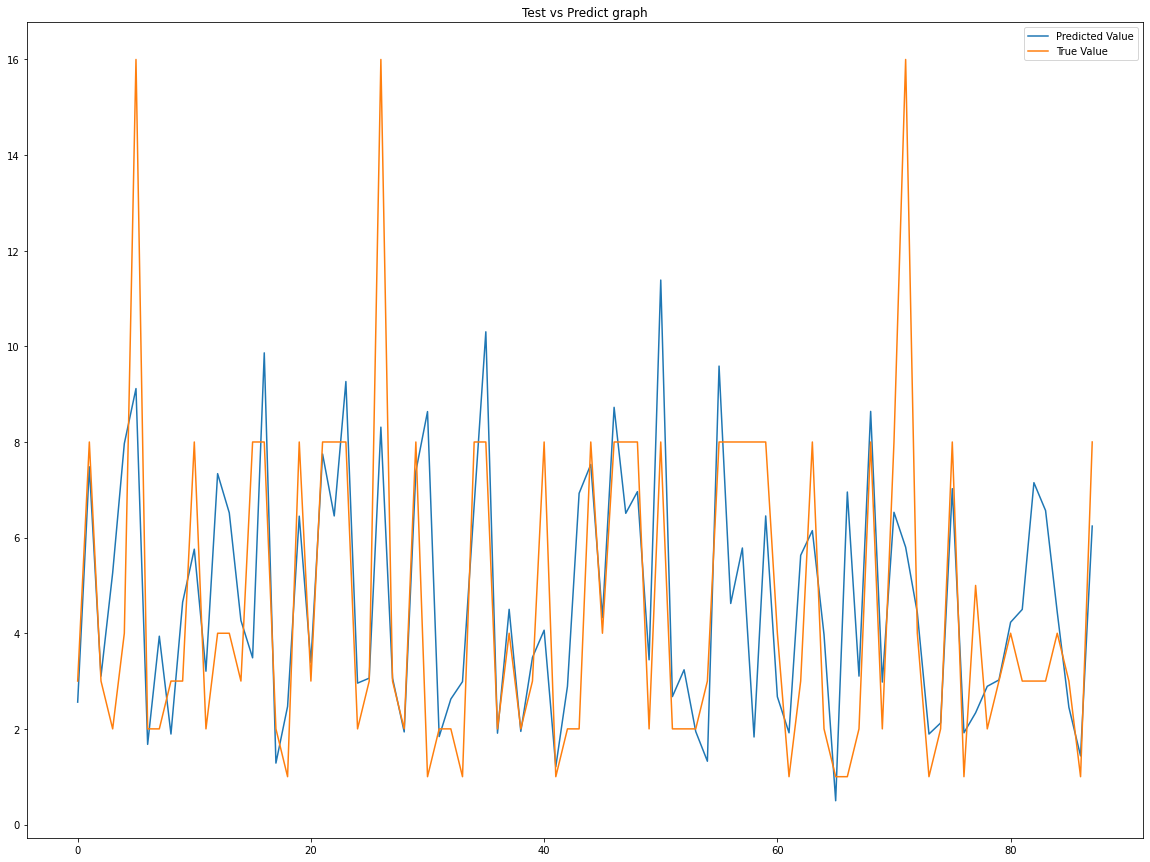

In [ ]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')

LASSO Regression

In [ ]:
model4.fit(x_train,y_train)
pred = model4.predict(x_test)
# y_test=y_test.to_numpy()

In [ ]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)
tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

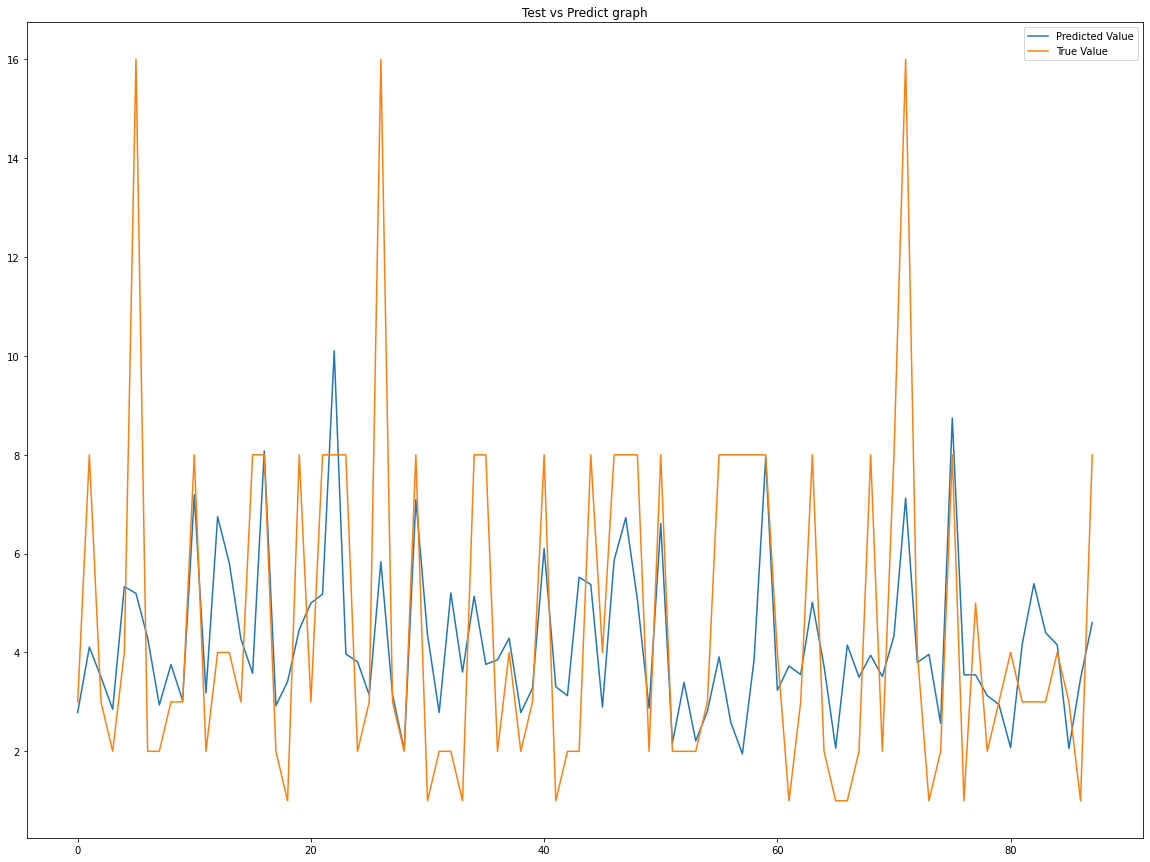

In [ ]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')

Linear Regression

In [ ]:
model5.fit(x_train,y_train)
pred = model5.predict(x_test)
# y_test=y_test.to_numpy()

In [ ]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)
tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

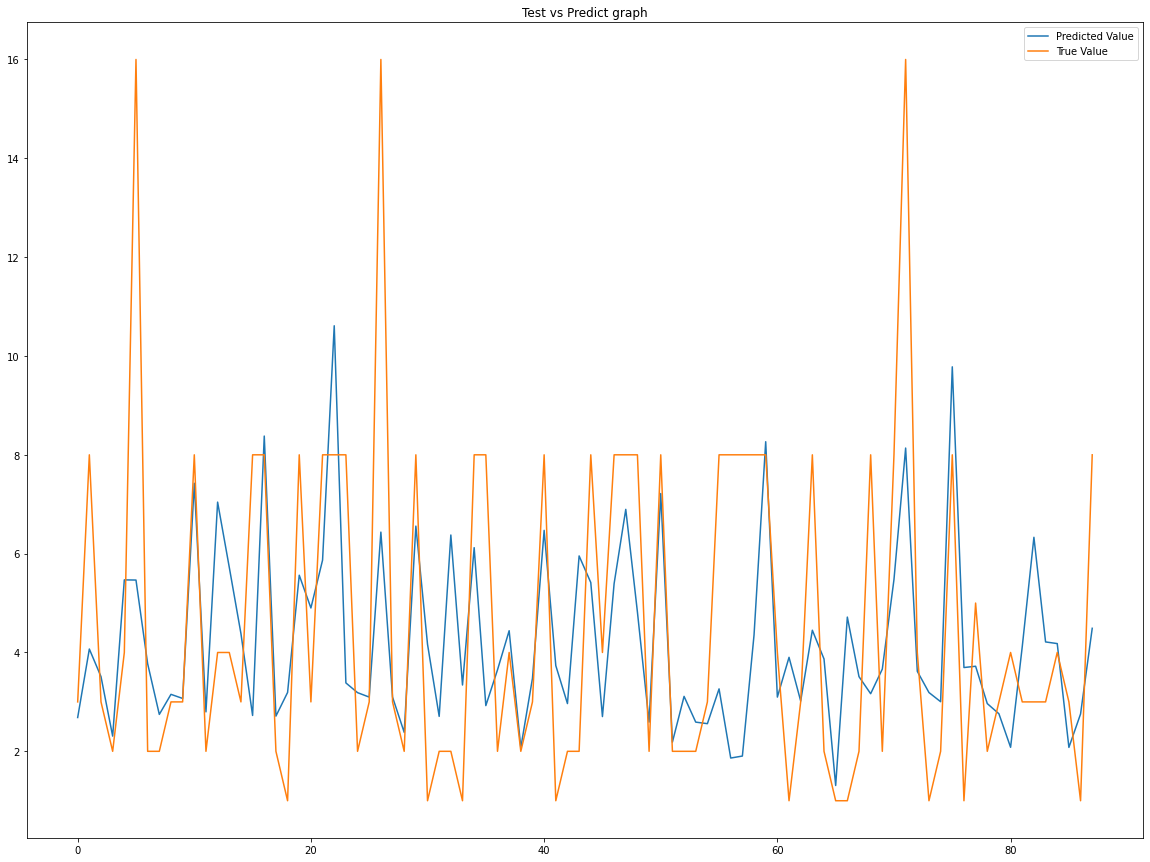

In [ ]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')

SGD Regression

In [ ]:
model6.fit(x_train,y_train)
pred = model6.predict(x_test)
# y_test=y_test.to_numpy()

In [ ]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)
tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

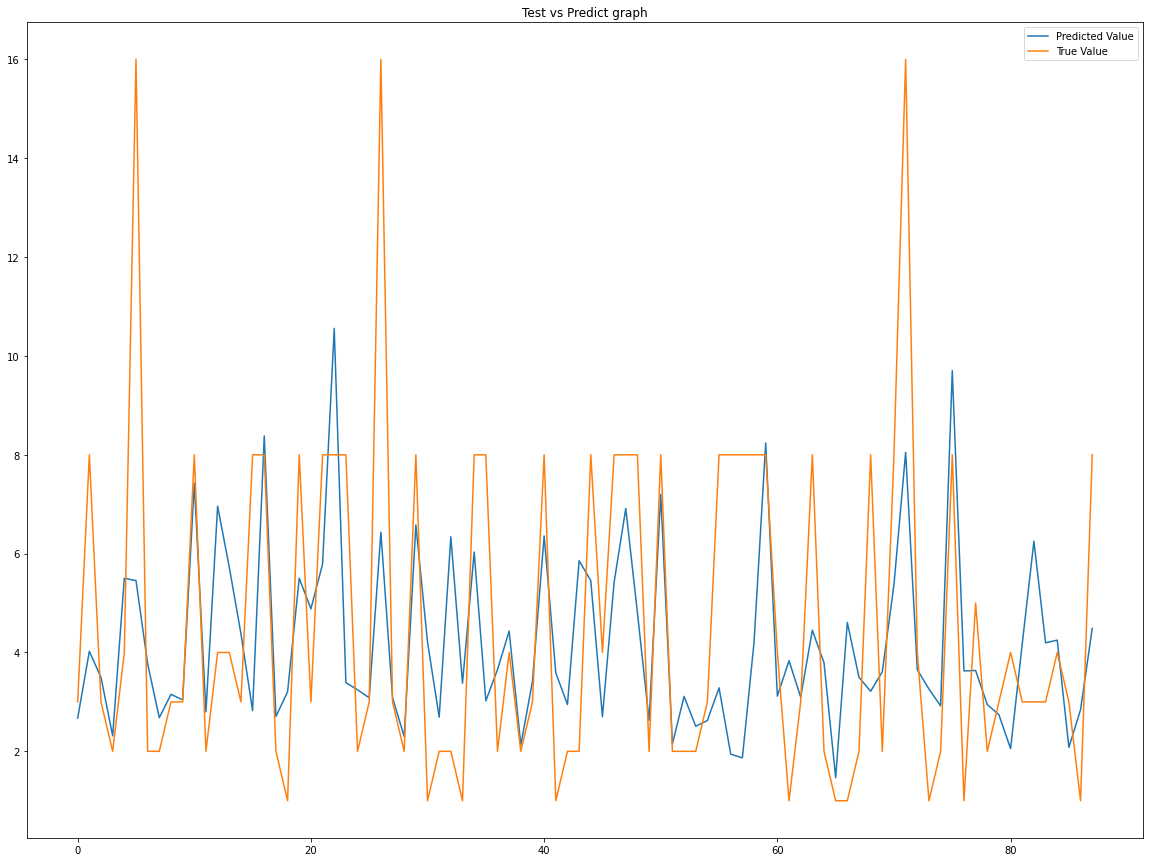

In [ ]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')

MLP Regression

In [ ]:
model7.fit(x_train,y_train)
pred = model7.predict(x_test)
# y_test=y_test.to_numpy()

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


In [ ]:
predicts = pred
predicts = np.asarray(predicts).reshape(-1)
tests = y_test
tests = np.asarray(tests).reshape(-1)

Text(0.5, 1.0, 'Test vs Predict graph')

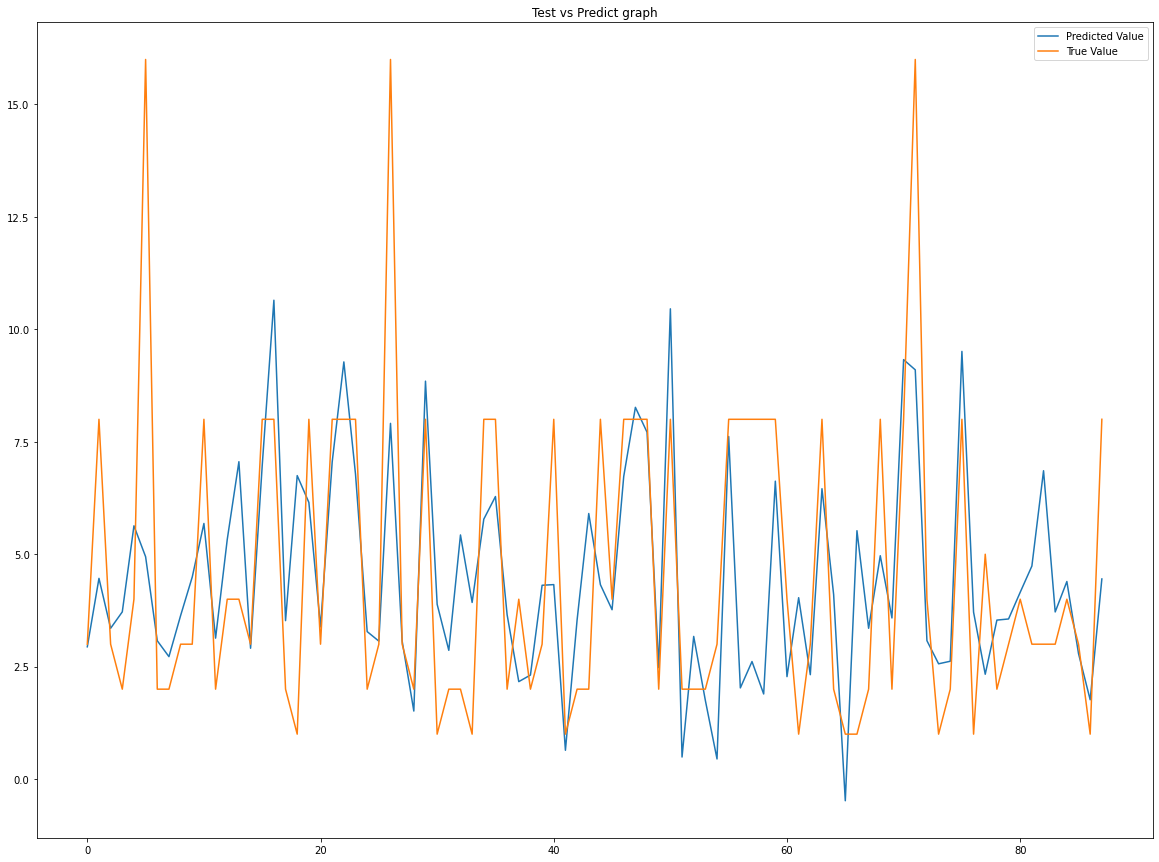

In [ ]:
plt.plot(predicts, label='Predicted Value') #plot the loss
plt.plot(tests, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Test vs Predict graph')

Applying SHAP

1   https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/

2   https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
shap.initjs()


In [ ]:
# explainer = shap.TreeExplainer(model5)
# shap_values = explainer.shap_values(x_train)
# shap.summary_plot(shap_values, features=x_train, feature_names=x_train.columns)